In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
#print(lat_lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.

#coordinates = zip(lats, lngs)
#coordinates = lat_lngs
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

darnah ly
bluff nz
tonantins br
manaus br
busselton au
punta arenas cl
bluff nz
taolanaro mg
carnarvon au
torbay ca
pevek ru
khatanga ru
iqaluit ca
rikitea pf
swan hill au
we nc
plettenberg bay za
tiksi ru
zyryanovsk kz
nizhneyansk ru
butaritari ki
ushuaia ar
kedrovyy ru
bluff nz
longyearbyen sj
quang ngai vn
mataura pf
ilhabela br
upernavik gl
upernavik gl
attawapiskat ca
busselton au
bluff nz
esperance au
smithers ca
cape town za
pankovka ru
hunza pk
candawaga ph
cabedelo br
tequila mx
mys shmidta ru
port alfred za
rio grande br
lagoa pt
beira mz
arkansas city us
lagoa pt
sapa ph
yellowknife ca
punta arenas cl
caravelas br
yuzhne ua
mackay au
madison heights us
bluff nz
bambous virieux mu
hilo us
jamestown sh
upata ve
kodiak us
jamestown sh
ushuaia ar
sataua ws
carnarvon au
mount isa au
manzil kamil tn
chaozhou cn
toktogul kg
kapaa us
punta arenas cl
alofi nu
sabirabad az
bluff nz
jasper ca
jamestown sh
cockburn town bs
jiaozuo cn
presidente medici br
bizhbulyak ru
moron mn
alekseyev

bethel us
banikoara bj
hobart au
jamestown sh
sao bento do una br
esperance au
bethel us
leningradskiy ru
busselton au
port-gentil ga
ushuaia ar
sao filipe cv
nikolskoye ru
tuktoyaktuk ca
saint george bm
turayf sa
albany au
amderma ru
albany au
hualmay pe
ilulissat gl
kapaa us
katsuura jp
sao filipe cv
mataura pf
moron mn
grindavik is
albany au
mahebourg mu
hay river ca
torbay ca
codrington ag
khatanga ru
puerto asis co
illoqqortoormiut gl
bluff nz
busselton au
burica pa
mandalgovi mn
eureka us
east london za
simiti co
tweed ca
xinyu cn
georgetown sh
pochutla mx
kapaa us
kapaa us
nizhniy tsasuchey ru
bethel us
gao ml
tasiilaq gl
merritt island us
corner brook ca
laishevo ru
boyolangu id
puerto ayora ec
arraial do cabo br
vaini to
katsuura jp
hasaki jp
geraldton au
torbay ca
nizhniy kuranakh ru
miragoane ht
vaini to
east london za
zhifang cn
ha tinh vn
dinar tr
cockburn town bs
illoqqortoormiut gl
puerto ayora ec
punta arenas cl
bagan ru
rolim de moura br
newport us
flinders au
barberto

punta arenas cl
grand-santi gf
gore et
rikitea pf
ushuaia ar
tuatapere nz
ostrovnoy ru
chifeng cn
chokurdakh ru
quang ngai vn
luderitz na
lugus ph
butaritari ki
cape town za
zhangye cn
ancud cl
san quintin mx
tuktoyaktuk ca
ushuaia ar
taoudenni ml
castro cl
rio grande br
ushuaia ar
omboue ga
airai pw
avarua ck
hithadhoo mv
mataura pf
bima id
cherskiy ru
kodiak us
ushuaia ar
rikitea pf
parabel ru
toguchin ru
lorengau pg
new norfolk au
key west us
casablanca ma
rikitea pf
port alfred za
bluff nz
bredasdorp za
hobart au
arraial do cabo br
saskylakh ru
korba in
moron mn
ushuaia ar


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [13]:
# Sect 6.2.6 
# for current weather by geo coordinates  https://openweathermap.org/current
# for OpenWeather API call:   api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}

# Import the requests library.
import requests
requests.__version__
# Import the API key.
from config import weather_api_key
requests.__version__

'2.24.0'

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b9e97dc0adf55059746159c152689a4


In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | darnah
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | tonantins
Processing Record 4 of Set 1 | manaus
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | swan hill
Processing Record 15 of Set 1 | we
City not found. Skipping...
Processing Record 16 of Set 1 | plettenberg bay
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | zyryanovsk
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | ushuaia
Proce

Processing Record 36 of Set 4 | vila velha
Processing Record 37 of Set 4 | kortkeros
Processing Record 38 of Set 4 | anchorage
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | luena
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | botucatu
Processing Record 44 of Set 4 | enshi
Processing Record 45 of Set 4 | barabai
Processing Record 46 of Set 4 | bauchi
Processing Record 47 of Set 4 | toliary
City not found. Skipping...
Processing Record 48 of Set 4 | lusambo
Processing Record 49 of Set 4 | gat
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | serenje
Processing Record 2 of Set 5 | aranda de duero
Processing Record 3 of Set 5 | marawi
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | zarinsk
Processing Record 6 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 5 | dombarovskiy
Processing Record 8 of Set 5 | esso
Processing Record 9

Processing Record 29 of Set 8 | komsomolskiy
Processing Record 30 of Set 8 | holalkere
Processing Record 31 of Set 8 | talas
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | marau
Processing Record 34 of Set 8 | puerto baquerizo moreno
Processing Record 35 of Set 8 | takaka
Processing Record 36 of Set 8 | marzuq
Processing Record 37 of Set 8 | tommot
Processing Record 38 of Set 8 | harbour breton
Processing Record 39 of Set 8 | amalapuram
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | banikoara
Processing Record 42 of Set 8 | sao bento do una
City not found. Skipping...
Processing Record 43 of Set 8 | port-gentil
Processing Record 44 of Set 8 | turayf
Processing Record 45 of Set 8 | hualmay
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | grindavik
Processing Record 48 of Set 8 | codrington
Processing Record 49 of Set 8 | puerto asis
Processing Record 50 of Set 8 | burica
City not foun

Processing Record 14 of Set 12 | jieshi
Processing Record 15 of Set 12 | soyo
Processing Record 16 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 17 of Set 12 | moose factory
Processing Record 18 of Set 12 | bilma
Processing Record 19 of Set 12 | korla
Processing Record 20 of Set 12 | zarasai
Processing Record 21 of Set 12 | pitimbu
Processing Record 22 of Set 12 | lodja
Processing Record 23 of Set 12 | te anau
Processing Record 24 of Set 12 | atar
Processing Record 25 of Set 12 | ouahigouya
Processing Record 26 of Set 12 | penzance
Processing Record 27 of Set 12 | sao paulo de olivenca
Processing Record 28 of Set 12 | abha
Processing Record 29 of Set 12 | bali
Processing Record 30 of Set 12 | laurel
Processing Record 31 of Set 12 | prince rupert
Processing Record 32 of Set 12 | rungata
City not found. Skipping...
Processing Record 33 of Set 12 | tarpon springs
Processing Record 34 of Set 12 | derzhavinsk
Processing Record 35 of Set 12 | kudahuvadhoo
Processing Rec

In [17]:
len(city_data)

586

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Darnah,32.77,22.64,76.44,80,0,13.71,LY,2020-08-31 01:27:56
1,Bluff,-46.60,168.33,58.26,60,0,25.01,NZ,2020-08-31 01:27:56
2,Tonantins,-2.87,-67.80,75.29,89,93,2.48,BR,2020-08-31 01:27:56
3,Manaus,-3.10,-60.02,77.00,88,0,2.80,BR,2020-08-31 01:24:11
4,Busselton,-33.65,115.33,45.00,92,0,7.05,AU,2020-08-31 01:27:57
5,Punta Arenas,-53.15,-70.92,32.00,90,12,5.82,CL,2020-08-31 01:27:39
6,Carnarvon,-24.87,113.63,68.00,82,0,11.41,AU,2020-08-31 01:27:57
7,Torbay,47.67,-52.73,68.00,100,90,23.04,CA,2020-08-31 01:27:58
8,Pevek,69.70,170.31,40.32,78,0,7.90,RU,2020-08-31 01:27:58
9,Khatanga,71.97,102.50,47.77,79,1,8.25,RU,2020-08-31 01:27:59


In [19]:
# Assigning new column order. 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Darnah,LY,2020-08-31 01:27:56,32.77,22.64,76.44,80,0,13.71
1,Bluff,NZ,2020-08-31 01:27:56,-46.60,168.33,58.26,60,0,25.01
2,Tonantins,BR,2020-08-31 01:27:56,-2.87,-67.80,75.29,89,93,2.48
3,Manaus,BR,2020-08-31 01:24:11,-3.10,-60.02,77.00,88,0,2.80
4,Busselton,AU,2020-08-31 01:27:57,-33.65,115.33,45.00,92,0,7.05
...,...,...,...,...,...,...,...,...,...
581,Parabel,RU,2020-08-31 01:30:45,58.70,81.48,58.15,87,93,7.78
582,Toguchin,RU,2020-08-31 01:30:46,55.24,84.39,60.69,85,55,1.70
583,Key West,US,2020-08-31 01:30:46,24.56,-81.78,87.80,66,1,6.93
584,Casablanca,MA,2020-08-31 01:30:46,33.59,-7.62,73.00,94,0,3.36


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Sect 6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598837908.7146337

In [25]:
today = time.strftime("%x")
today

'08/30/20'

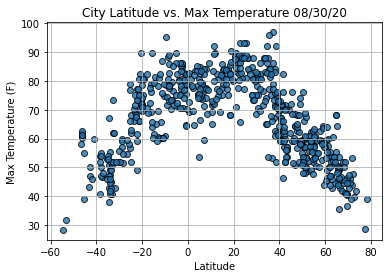

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

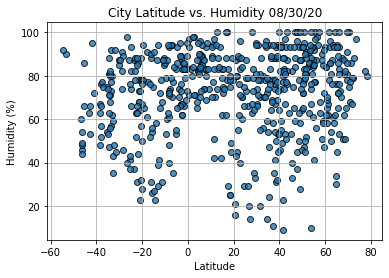

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

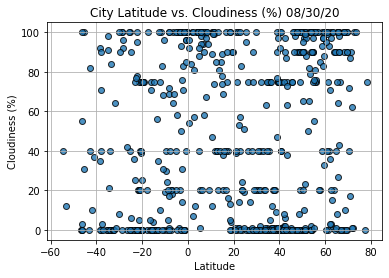

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

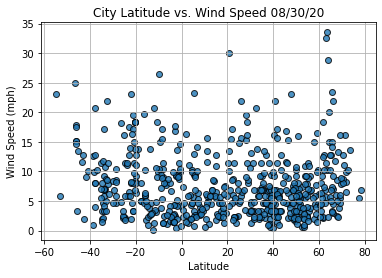

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Sect 6.4.1
